# Linear Regression

## Problem Set:
We have '농어' length and weight.   
In here, when new '농어' of length is given, we want to predict the '농어' of weight. 

## Solution:
Step 1: Use k-nearest neighbor
 -> Check the problem in this model.

Step 2: Use linear regression (linear expression)
 -> Check the problem in linear expression

Step 3: Use linear regression (Exponential expression)
 -> Check solution 

In [165]:
# Library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#### Prepare data set
prech is '농어'

In [166]:
# perch data 
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

sli = train_test_split(perch_length, perch_weight, random_state=42)

# make train data
train_input = sli[0].reshape(-1, 1)
train_target = sli[2].reshape(-1, 1)

# make test data
test_input = sli[1].reshape(-1, 1)
test_target = sli[3].reshape(-1, 1)

#### Predict new fish weight by K-nearest neighbor regeression
value of prediction is 1033  
value of real is 1500  

In [212]:
# Declaration
knr = KNeighborsRegressor(n_neighbors=3)

# Training
knr.fit(train_input, train_target)

# new fish length = 50 
new_fish_input = [[50]]

# Predict
new_fish_target = knr.predict(new_fish_input)

# result is 1033 gram but real '농어' is 1500 gram 
# error is too big ! 
# What is  problem ?
print(new_fish_target)

[[1033.33333333]]


#### Draw graph (K-nearest neighbor regeression)
A new fish predicted by a model placed in a strange position.

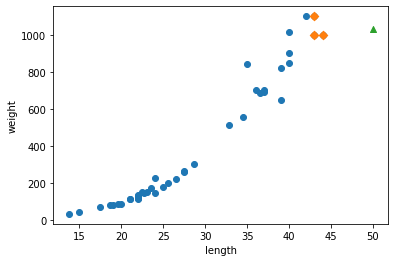

In [168]:
# indexes of nearest neighbors from new_fish_input
distances, indexes = knr.kneighbors(new_fish_input)

# train data set
plt.scatter(train_input, train_target)

# nearest neighbors data set
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# new fish data set
plt.scatter(new_fish_input, new_fish_target, marker='^')

# draw graph
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# We can see that scatter  graph is increase depend on length.
# but new_fish(green) location is too strange
# 'new_fish ' get off the training range.
# So, result is too strange

How did the 'k-nearest neighbor regression' model calculate new fish  location?

In [169]:
# new_fish_target value is mean(nearest neighbor from new_fish)
mean_nearest_neighbor = np.mean(train_target[indexes])
print("mean of nearest neigbor: " + str(mean_nearest_neighbor))

longest_length = np.max(train_input)
print("longest length: " + str(longest_length), end="\n\n")

mean of nearest neigbor: 1033.3333333333333
longest length: 44.0



K-nearest neighbor regression Problem

Since inpt 44:
[[  44.         1033.33333333]
 [  45.         1033.33333333]
 [  46.         1033.33333333]
 ...
 [ 997.         1033.33333333]
 [ 998.         1033.33333333]
 [ 999.         1033.33333333]]



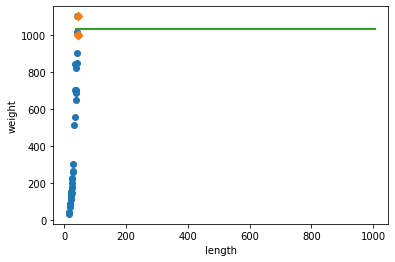

In [170]:
# Since input 44 (maximum length), the model always predicts 1033 values.
print("Since inpt 44:")
new_fish_after_44 = []

for length in range(44, 1000):
  result = knr.predict([[length]])
  fish = [length, result[0][0]]
  new_fish_after_44.append(fish)

new_fish_after_44 = np.array(new_fish_after_44)
print(new_fish_after_44, end="\n\n")

distances, indexes = knr.kneighbors(new_fish_input)
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(new_fish_after_44[:, 0], new_fish_after_44[:, 1], marker='_')

# draw graph
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# We can see that scatter  graph is increase depend on length.
# but new_fish(green) location is too strange
# 'new_fish ' get off the training range.
# So, result is too strange

#### New prediction way: Linear Regression
$ \displaystyle y = Wx + b $ (W=weight, b=bias)

In [171]:
# y = Wx + b (W=weight, b=bias)
lr = LinearRegression()

lr.fit(train_input, train_target)

new_fish_target = lr.predict(new_fish_input)
print("reuslt:", new_fish_target[0][0])

W = lr.coef_ # coefficent = weight = model parameter
b = lr.intercept_ # biso

# unzip list
W = W[0][0]
b = b[0]

print("Weight: ", W)
print("Bias  : ", b)

# Notice: W(Weight) is not same fish_weight 
# W(weight) is parameter which use model(linear Regression)
# or The slope of the first equation

reuslt: 1241.8386032279625
Weight:  39.0171449636302
Bias  :  -709.0186449535477


#### Draw Graph (Linear regresion)


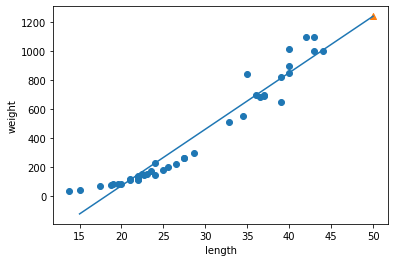

In [172]:
# draw scatter
plt.scatter(train_input, train_target)
plt.scatter(new_fish_input, new_fish_target, marker="^")

# draw linear function (15 ~ 50)
plt.plot([15, 50], [W*15 + b, W*50 + b])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

#### Check prediction way 
$ \displaystyle y = Wx + b $ (W=weight, b=bias) : linear expression

In [173]:
# So, If new fish length is 80,
# model predict 2,412.3529521368683
# way: result = W*80 + b (W=39.0171449636302, b=-709.0186449535477)

# predict
new_fish2 = [[80]]
result2 = lr.predict(new_fish2)

result2 = result2[0][0] # unzip list
calculation = W*80 + b

# Check result
print("result      : ", result2)
print("calculation : ", calculation)

result      :  2412.352952136868
calculation :  2412.352952136868


Check Score (linear regresion) : linear expression

In [174]:
socre_train = lr.score(train_input, train_target)
score_test = lr.score(test_input, test_target)
score_differ = socre_train - score_test

# Overffiting and train socre is bad
print("score_train  : ", socre_train)
print("score_test   : ", score_test)
print("score_differ : ", score_differ)

score_train  :  0.9398463339976039
score_test   :  0.8247503123313558
score_differ :  0.1150960216662481


Another Problem of linear expression



minus_index:  18


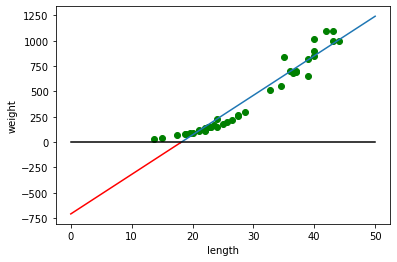

In [175]:
for i in range(50, 0, -1):
  result = lr.predict([[i]])
  if result[0][0] < 0:
    minus_index = i
    break

# this mean the model predict that below 18 length is always minus value(weight).
# But, there are not fish('도미') which have minus weight in real world
print("minus_index: ", minus_index)

# draw scatter
plt.scatter(train_input, train_target, color="green")

# draw linear function (0 ~ 50)
plt.plot([minus_index, 50], [W*minus_index + b, W*50 + b]) # blue line
plt.plot([0, minus_index], [W*0 + b, W*minus_index + b], color="red") # red line
plt.plot([0, 50], [0, 0], color="black")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# So, In this model, prediction of straight line is not proper
# When you see the scatter with real fish data,  
# you can see that the scatter look like Exponential function

#### Polynomial regression
Exponential expression: y = $ \displaystyle W_1x^2 + W_2x +b $

notice: This also linear regression

In [176]:
#make poly

# train_poly_input = [length^2, length]
train_poly_input = np.column_stack((train_input ** 2, train_input))

# test_poly_input = [length^2, length]
test_poly_input = np.column_stack((test_input ** 2, test_input))


Prediction (linear regression : exponential expression)

In [177]:
lr = LinearRegression()
lr.fit(train_poly_input, train_target)

# unzip matrix
new_fish_temp = new_fish_input[0][0]

# poly
new_fish_poly_input = np.column_stack((new_fish_temp ** 2, new_fish_temp))

# predict
new_fish_poly_target = lr.predict(new_fish_poly_input)

print("Result: ", new_fish_poly_target)

Result:  [[1573.98423528]]


Weight, Bias of linear regression : exponential expression  

In [183]:
W = lr.coef_[0]
b = lr.intercept_[0]

print("Weight : ", W) # W_1, W_2
print("Bias   : ", b)

Weight :  [  1.01433211 -21.55792498]
Bias   :  116.05021078278276


Draw graph (linear regression : exponential expression)

new_fish_poly_input  :  [[2500   50]]
new_fish_poly_target :  [[1573.98423528]]





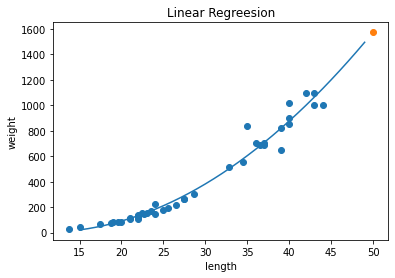

In [204]:
# arrage of 15 ~ 50 
points = np.arange(15, 50)

x_points = points
y_points = W[0]*(points ** 2) + W[1]*points + b

plt.scatter(train_input, train_target) # real fish data
plt.plot(x_points, y_points) # prediction line

print("new_fish_poly_input  : ", new_fish_poly_input)
print("new_fish_poly_target : ", new_fish_poly_target)

# unzip matrix
new_fish_input_temp = new_fish_poly_input[0][1] # 50 cm
new_fish_target_temp = new_fish_poly_target[0][0] # 1573 1500 gram

# new fish
plt.scatter(new_fish_input_temp, new_fish_target_temp) # new fish

# draw graph
print("\n\n")
plt.title("Linear Regreesion")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

Score (linear regression : exponential expression)

In [211]:
score_train = lr.score(train_poly_input, train_target)
score_test = lr.score(test_poly_input, test_target)
score_differ = score_train - score_test

## Check score
print("score_train : ", score_train)
print("score_test  : ", score_test)
print(score_differ)

# steel underffting

score_train :  0.9706807451768623
score_test  :  0.9775935108325122
-0.006912765655649911
